In [ ]:
#pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from Bio import SeqIO, Seq
import Bio
from collections import Counter

#makes viewing pandas tables better
# pd.set_option('display.max_colwidth', 0)



In [2]:
#df = pd.read_csv(/usr2/people/shollyt22/shollyt22/Barseq_July_2023/OORB003_TnSeq/for_analysis/TNSeq_mapping_output_new_genome_without_vector/Tnseq_08_10_2023_annotated.csv, sep='\t')
file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Barseq_Temp_study_11_04_2023/TNSeq_mapping_output_new_genome_without_vector_seq_11_04_2023/Tnseq_11_04_2023_annotated.csv'
#df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep='\t', quotechar='"') #this is the modified line to accept my annotated file

In [3]:
print('Total barcodes: {}'.format(len(df['barcode'].unique())))

Total barcodes: 4986


In [4]:
#if you don't want to filter by read count, set min_read_count_per_barcode = 1

min_read_count_per_barcode = 1
df = df[df['nMainLocation'] >= min_read_count_per_barcode]

print('Barcodes with at least {} reads (to be used in further analysis): {}'.format(min_read_count_per_barcode, df.shape[0]))

Barcodes with at least 1 reads (to be used in further analysis): 4986


### Plot barcode count vs. chromosome position

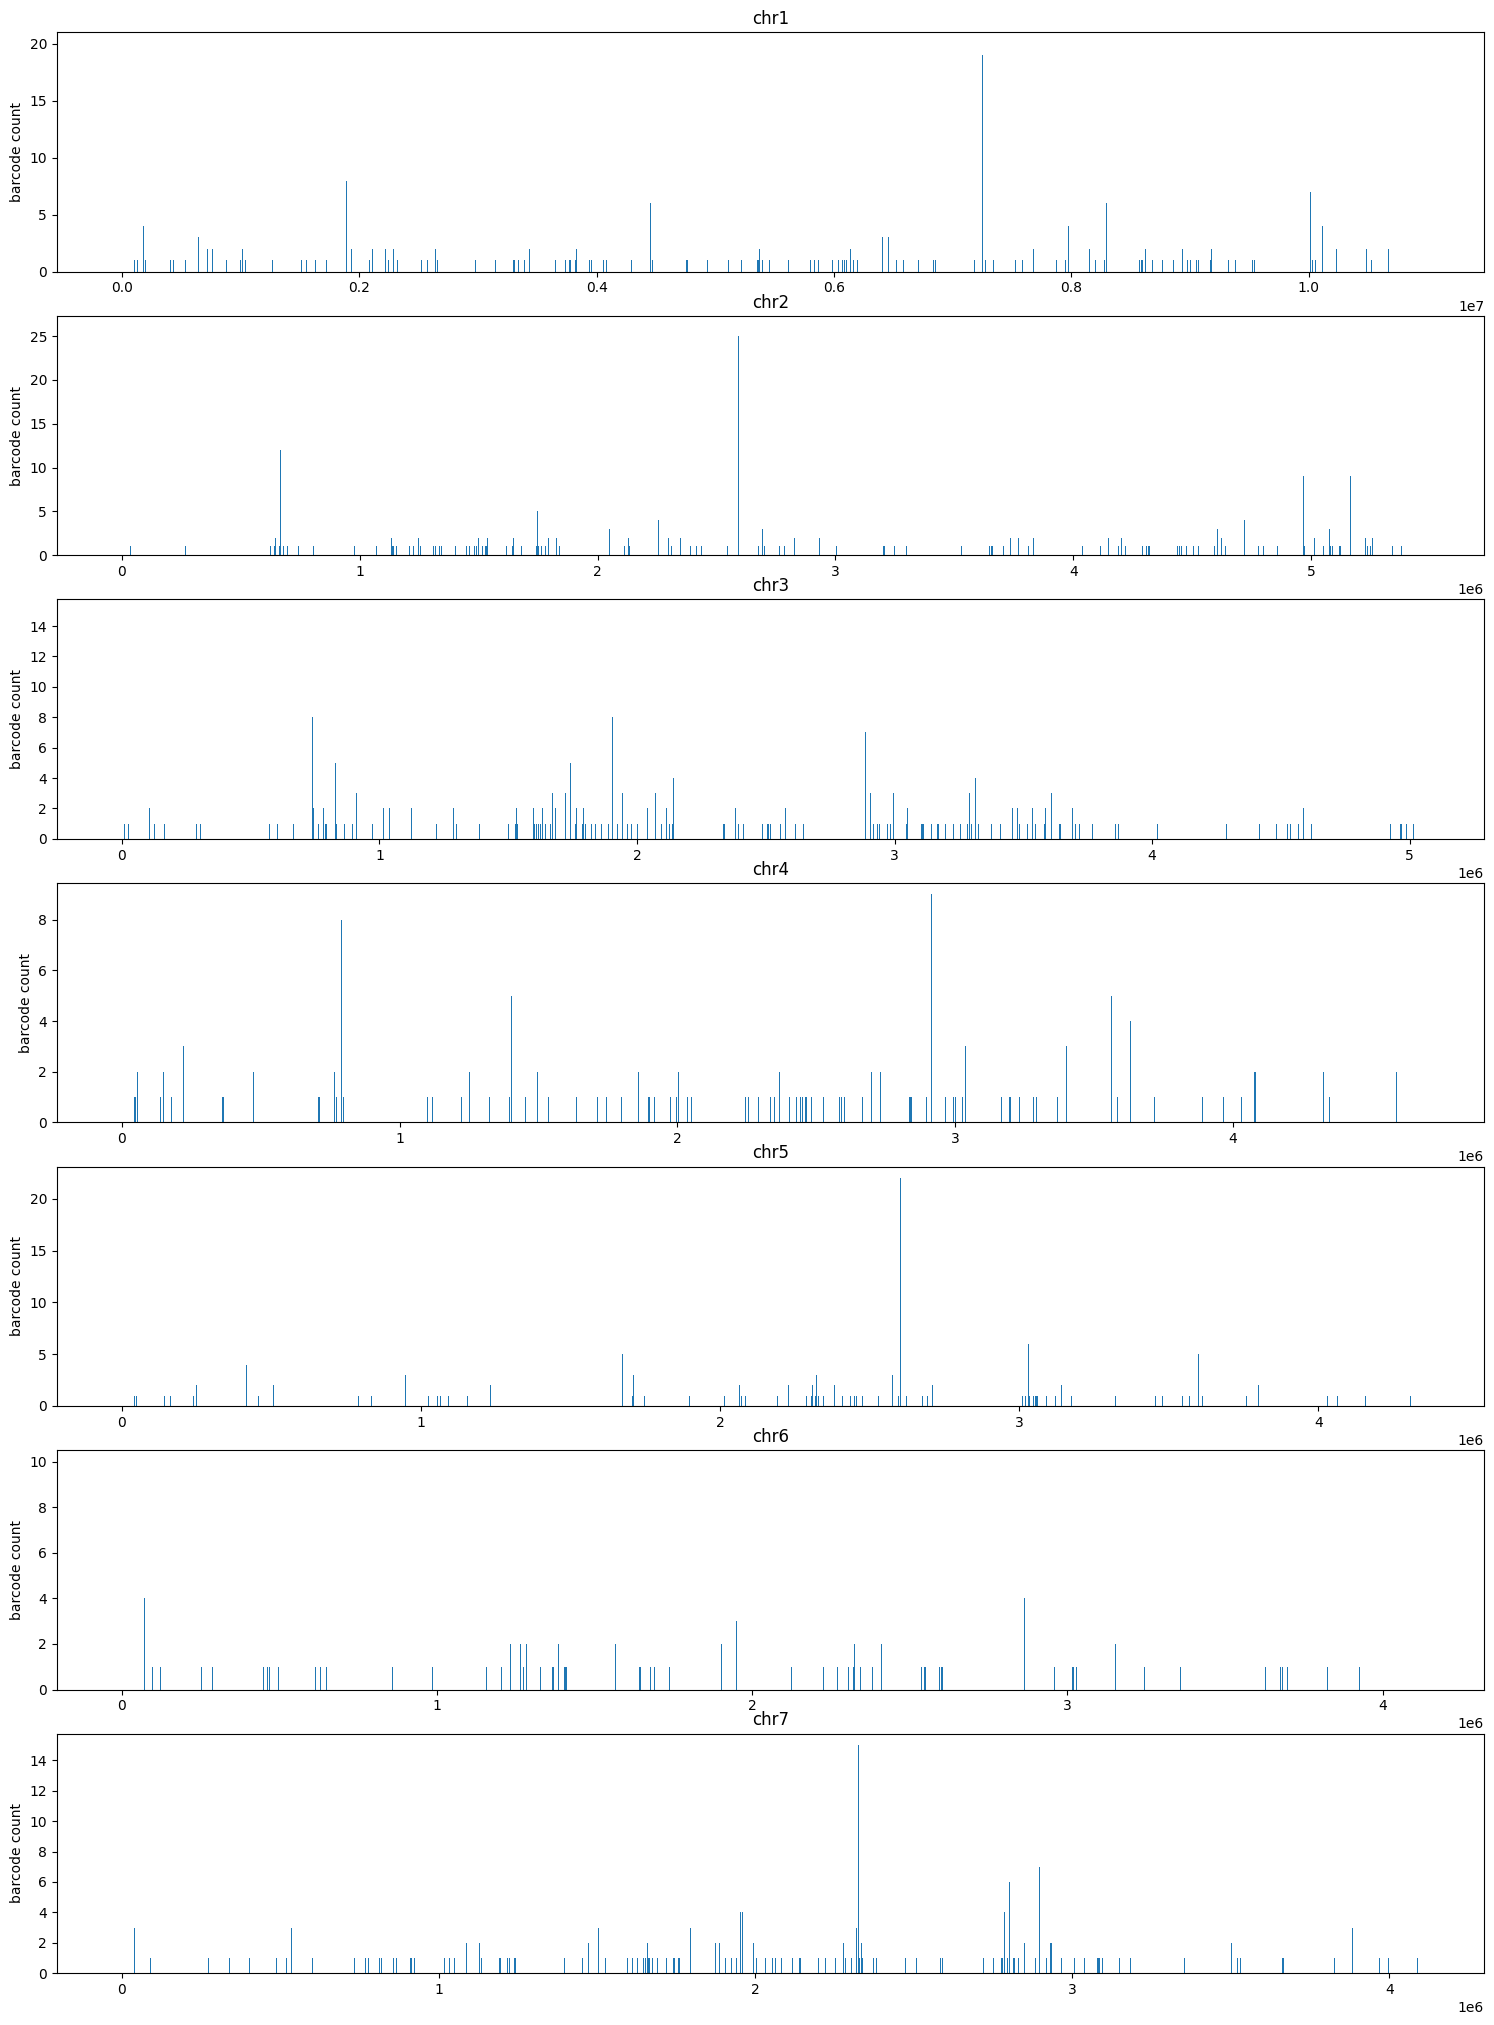

In [6]:
scaffolds = sorted(df['scaffold'].unique())

fig, ax = plt.subplots(len(scaffolds), figsize=(15,20))
plt.tight_layout()

for i, scaffold in enumerate(scaffolds):
    
    temp = df[df['scaffold']==scaffold]
    ax[i].hist(temp['pos'], bins=np.arange(0,max(temp['pos']),1000))
    ax[i].set_title(scaffold)
    ax[i].set_ylabel('barcode count')
    fig.savefig(f'scaffold_{scaffold}_plot_1.png')

    # Save the plots
#for i, scaffold in enumerate(scaffolds):
    #fig.savefig(f'scaffold_{scaffold}_plot.png')
    
plt.show()

### Plot inserts per gene

In [ ]:
inserts_per_gene = df.groupby('gene').count()['barcode']

plt.hist(inserts_per_gene, bins=np.arange(0, max(inserts_per_gene)))
plt.xlabel('number of inserts')
plt.ylabel('number of genes')
plt.show()

### Are there positions were transposons frequently were inserted?

In [ ]:
genome_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/TnSeq_Results_may_2023/TnSeq_M003593/analysed_files/Myceliopthora_genome_sequence.txt'

In [ ]:
!wc -m {genome_path}

In [ ]:
num_barcodes = len(df['barcode'].unique())

#rough approxiomation
genome_size = 39297749  #this should be replaced with that of Myceliopthora 

In [ ]:
num_barcodes/39297749

We don't have complete coverage, so we don't expect multiple barcodes to be inserted in the same position.

In [ ]:
counts = df.value_counts(['scaffold', 'pos'])

plt.figure(figsize=(8,5))
plt.hist(counts, bins=np.arange(0,max(counts),1))
plt.xlabel('number of insertions at position')
plt.ylabel('# of positions')

plt.show()

In [ ]:
##10k positions have multiple barcodes inserted at saame spot
counts[counts >= 3]